In [1]:
!pip install scipy

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#Load csv
file_path = ('/content/houston-aqi-2010-2021.csv')
df = pd.read_csv (file_path)

#Printing the csv file will help us to check the column names
print (df.head())

ModuleNotFoundError: No module named 'seaborn'

Fail to reject the null hypothesis: The standard deviations are equal.
Sample Mean: 1018.87125
Sample Standard Deviation: 5.794011605902931
Confidence Interval for Standard Deviation: (47.2882667216256, 70.28141881386763)


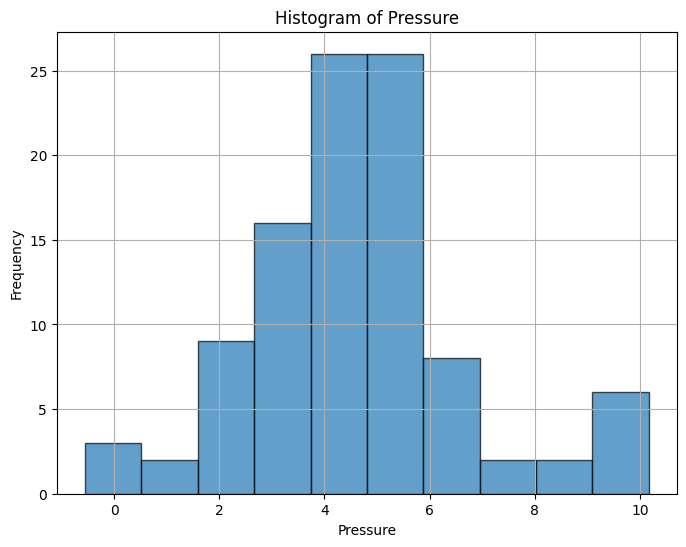

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import f

# Load the data
file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Selection of '100' random samples from 'PRESSURE' column
random_indices = np.random.choice(df.index, 100, replace=False)
sample_size = 100
selected_samples_pressure = data.loc[random_indices, 'avg_pressure']

# Describing the statistics
sample_mean = np.mean(selected_samples_pressure)
sample_std = np.std(selected_samples_pressure, ddof=1)

# Calculation of sample Standard deviation
sample_std = np.std(selected_samples_pressure, ddof=1)

# Performing hypothesis test for standard deviations
# -->Null hypothesis (H0): The standard deviations are equal
# -->Alternative hypothesis (H1): The standard deviations are not equal

# Selecting another random sample from the 'PRESSURE' column
comparison_sample = data['avg_pressure'].sample(sample_size)

# Calculation of sample standard deviation for the compared random sample
comparison_std = np.std(comparison_sample, ddof=1)

# Calculation of F-Statistics
F_statistic = (sample_std ** 2) / (comparison_std ** 2)

# Calculating the critical value for 95% confidence level
alpha = 0.05
df_num = sample_size - 1
df_den = sample_size - 1
critical_F_value = f.ppf(1 - alpha / 2, df_num, df_den)

# Comparison of F-Statistic with Critical F-Value
if F_statistic > critical_F_value or F_statistic < 1 / critical_F_value:
    print("Reject the null hypothesis: The standard deviations are not equal.")
else:
    print("Fail to reject the null hypothesis: The standard deviations are equal.")

# Constructing Confidence Interval for Standard deviation
confidence_level = 0.95
alpha_CI = 1 - confidence_level
lower_bound = np.sqrt((sample_size - 1) * sample_std ** 2 / f.ppf(1 - alpha_CI / 2, df_num, df_den))
upper_bound = np.sqrt((sample_size - 1) * sample_std ** 2 / f.ppf(alpha_CI / 2, df_num, df_den))

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Confidence Interval for Standard Deviation: ({lower_bound}, {upper_bound})")

# Sampling of data
data = np.random.normal(loc=5, scale=2, size=100)

# Plotting a histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of Pressure')
plt.grid(True)
plt.show()


In [54]:
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_ind

# Implementing mean comparison function for 'WIND', 'TEMPERATURE', 'HUMIDITY', 'PRESSURE'
def mean_comparison(sample1, sample2, variable_name1, variable_name2):
    # Calculating the mean of the samples
    mean1, mean2 = np.mean(sample1), np.mean(sample2)

    # Hypothesis: --> H0 - The means are equal
    #             --> H1 - The means are not equal
    # Performance of hypothesis test for mean
    t_statistic_mean, p_value_mean = ttest_ind(sample1, sample2)

    # Calculation of confidence interval for the mean difference
    diff_mean = mean1 - mean2
    std_error_mean_diff = np.sqrt((np.var(sample1, ddof=1) / len(sample1)) + (np.var(sample2, ddof=1) / len(sample2)))
    margin_of_error_mean_diff = t.ppf(1 - alpha / 2, df=len(sample1) + len(sample2) - 2) * std_error_mean_diff
    ci_mean_diff = (diff_mean - margin_of_error_mean_diff, diff_mean + margin_of_error_mean_diff)

    # Printing the results
    print(f"\nComparison between {variable_name1} and {variable_name2} (Mean Comparison):")
    print(f"{variable_name1} Mean: {mean1}")
    print(f"{variable_name2} Mean: {mean2}")
    print(f"T-Statistic for Mean: {t_statistic_mean}")
    print(f"P-Value for Mean: {p_value_mean}")
    print(f"Confidence Interval for Mean Difference: {ci_mean_diff}")

    # Interpret the results based on the test performed
    if p_value_mean < alpha:
        print(f"\nReject the null hypothesis for mean. There is enough evidence to suggest that the means are different.")
    else:
        print(f"\nFail to reject the null hypothesis for mean. There is not enough evidence to suggest that the means are different.")

# Selection of '100' random samples from 'WIND', 'TEMPERATURE', 'HUMIDITY', 'PRESSURE'
random_indices = np.random.choice(df.index, 100, replace=False)
selected_samples_wind = data.loc[random_indices, 'avg_wind']
selected_samples_temperature = data.loc[random_indices, 'avg_temperature']
selected_samples_humidity = data.loc[random_indices, 'avg_humidity']
selected_samples_pressure = data.loc[random_indices, 'avg_pressure']

# Performing mean comparison for all pairs of variables
mean_comparison(selected_samples_wind, selected_samples_pressure, 'Wind', 'Pressure')
mean_comparison(selected_samples_wind, selected_samples_temperature, 'Wind', 'Temperature')
mean_comparison(selected_samples_wind, selected_samples_humidity, 'Wind', 'Humidity')
mean_comparison(selected_samples_temperature, selected_samples_pressure, 'Temperature', 'Pressure')
mean_comparison(selected_samples_temperature, selected_samples_humidity, 'Temperature', 'Humidity')
mean_comparison(selected_samples_humidity, selected_samples_pressure, 'Humidity', 'Pressure')


Comparison between Wind and Pressure (Mean Comparison):
Wind Mean: 5.00647344
Pressure Mean: 1017.82000002
T-Statistic for Mean: -1511.2751199070872
P-Value for Mean: 0.0
Confidence Interval for Mean Difference: (-1014.1351165075342, -1011.4919366524656)

Reject the null hypothesis for mean. There is enough evidence to suggest that the means are different.

Comparison between Wind and Temperature (Mean Comparison):
Wind Mean: 5.00647344
Temperature Mean: 68.89191659999999
T-Statistic for Mean: -43.25104619837081
P-Value for Mean: 7.788495767892666e-103
Confidence Interval for Mean Difference: (-66.79827930072274, -60.972607019277234)

Reject the null hypothesis for mean. There is enough evidence to suggest that the means are different.

Comparison between Wind and Humidity (Mean Comparison):
Wind Mean: 5.00647344
Humidity Mean: 66.07375001000001
T-Statistic for Mean: -50.23475727871362
P-Value for Mean: 1.2377482936542493e-114
Confidence Interval for Mean Difference: (-63.464535823221

In [69]:
import numpy as np
from scipy.stats import f, chi2

# Set seed for reproducibility
np.random.seed(42)

# Function to perform hypothesis test and calculate CI for standard deviation
def std_dev_comparison(sample1, sample2, variable_name1, variable_name2):

    # Calculate standard deviation of the samples
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)

    # Hypothesis: H0 - The standard deviations are equal
    #             H1 - The standard deviations are not equal
    # Perform a hypothesis test for the standard deviation
    f_statistic_var = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
    degrees_of_freedom_var1 = len(sample1) - 1
    degrees_of_freedom_var2 = len(sample2) - 1
    p_value_var = 2 * (1 - f.cdf(f_statistic_var, dfn=degrees_of_freedom_var1, dfd=degrees_of_freedom_var2))

    # Ensure sample1 has higher values
    if np.mean(sample1) < np.mean(sample2):
        sample1, sample2 = sample2, sample1

    ci_var_ratio = (1 / f.ppf(1 - alpha / 2, dfn=degrees_of_freedom_var1, dfd=degrees_of_freedom_var2),
                    f.ppf(1 - alpha / 2, dfn=degrees_of_freedom_var2, dfd=degrees_of_freedom_var1))

    # Print results
    print(f"\nComparison between {variable_name1} and {variable_name2} (Standard Deviation Comparison):")
    print(f"{variable_name1} Standard Deviation: {std1}")
    print(f"{variable_name2} Standard Deviation: {std2}")
    print(f"F-Statistic for Standard Deviation: {f_statistic_var}")
    print(f"P-Value for Standard Deviation: {p_value_var}")
    print(f"Confidence Interval for Standard Deviation Difference: {ci_var_ratio}")

    # Interpret the results
    if p_value_var < alpha:
        print(f"Reject the null hypothesis for standard deviation. There is enough evidence to suggest that the standard deviations are different.")
    else:
        print(f"Fail to reject the null hypothesis for standard deviation. There is not enough evidence to suggest that the standard deviations are different.")

# Function to calculate confidence interval for standard deviation
def confidence_interval_std(sample, alpha=0.05):
    n = len(sample)
    s = np.std(sample, ddof=1)

    # Calculate critical values
    chi2_lower = chi2.ppf(alpha / 2, df=n - 1)
    chi2_upper = chi2.ppf(1 - alpha / 2, df=n - 1)

    # Calculate confidence interval for standard deviation
    ci_lower = np.sqrt((n - 1) * s**2 / chi2_upper)
    ci_upper = np.sqrt((n - 1) * s**2 / chi2_lower)

    return ci_lower, ci_upper

# Example usage:
# Randomly select 100 samples from 'wind', 'temperature', 'humidity', and 'pressure'
random_indices_wind = np.random.choice(df.index, 100, replace=False)
random_indices_temperature = np.random.choice(df.index, 100, replace=False)
random_indices_humidity = np.random.choice(df.index, 100, replace=False)
random_indices_pressure = np.random.choice(df.index, 100, replace=False)

selected_samples_wind = data.loc[random_indices_wind, 'avg_wind']
# Perform confidence interval calculation for standard deviation of 'wind'
ci_lower, ci_upper = confidence_interval_std(selected_samples_wind)
print(f"Confidence Interval for Standard Deviation of Wind: ({ci_lower}, {ci_upper})")

selected_samples_temperature = data.loc[random_indices_temperature, 'avg_temperature']
# Perform confidence interval calculation for standard deviation of 'temperature'
ci_lower, ci_upper = confidence_interval_std(selected_samples_temperature)
print(f"Confidence Interval for Standard Deviation of Temperature: ({ci_lower}, {ci_upper})")

selected_samples_humidity = data.loc[random_indices_humidity, 'avg_humidity']
# Perform confidence interval calculation for standard deviation of 'humidity'
ci_lower, ci_upper = confidence_interval_std(selected_samples_humidity)
print(f"Confidence Interval for Standard Deviation of Humidity: ({ci_lower}, {ci_upper})")

selected_samples_pressure = data.loc[random_indices_pressure, 'avg_pressure']
# Perform confidence interval calculation for standard deviation of 'pressure'
ci_lower, ci_upper = confidence_interval_std(selected_samples_pressure)
print(f"Confidence Interval for Standard Deviation of Pressure: ({ci_lower}, {ci_upper})")

# Perform standard deviation comparison and confidence interval calculation for the specified pairs
std_dev_comparison(selected_samples_pressure, selected_samples_wind, 'Pressure', 'Wind')
std_dev_comparison(selected_samples_pressure, selected_samples_temperature, 'Pressure', 'Temperature')
std_dev_comparison(selected_samples_wind, selected_samples_temperature, 'Wind', 'Temperature')
std_dev_comparison(selected_samples_wind, selected_samples_humidity, 'Wind', 'Humidity')
std_dev_comparison(selected_samples_temperature, selected_samples_humidity, 'Temperature', 'Humidity')
std_dev_comparison(selected_samples_temperature, selected_samples_pressure, 'Temperature', 'Pressure')



Confidence Interval for Standard Deviation of Wind: (2.11289852800281, 2.795538496969528)
Confidence Interval for Standard Deviation of Temperature: (11.303004858034866, 14.954804877420047)
Confidence Interval for Standard Deviation of Humidity: (10.262936599185862, 13.578709045767978)
Confidence Interval for Standard Deviation of Pressure: (5.611285430071422, 7.424192042045859)

Comparison between Pressure and Wind (Standard Deviation Comparison):
Pressure Standard Deviation: 6.390935855961704
Wind Standard Deviation: 2.4064715885340355
F-Statistic for Standard Deviation: 7.052895353007576
P-Value for Standard Deviation: 2.220446049250313e-16
Confidence Interval for Standard Deviation Difference: (0.6728416631266823, 1.486233767619293)
Reject the null hypothesis for standard deviation. There is enough evidence to suggest that the standard deviations are different.

Comparison between Pressure and Temperature (Standard Deviation Comparison):
Pressure Standard Deviation: 6.3909358559617